## Analyse des données Vigilo pour identifier les heures où ont lieu les observations

In [1]:
%matplotlib inline

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Getting data
resp = requests.get('https://vigilo.jesuisundesdeux.org/get_issues.php')
df = pd.DataFrame(resp.json())

print(df)

                                               address approved categorie  \
0                        Avenue de Lodève, Montpellier        1         2   
1                        Avenue de Lodève, Montpellier        1         4   
2                        Avenue de Lodève, Montpellier        1         2   
3                       Rue Joseph Cugnot, Montpellier        1         3   
4                          Route de Mende, Montpellier        1         2   
5                                   golf de castelnau         1         2   
6                         Avenue de Nîmes, Montpellier        1         2   
7    Avenue de l'École d'Agriculture Gabriel Buchet...        1         2   
8                            Rue du Truel, Montpellier        1         4   
9             Rue du Faubourg Figuerolles, Montpellier        1         2   
10                           Avenue Lepic, Montpellier        1         3   
11                    Boulevard Renouvier, Montpellier        1         3   

In [2]:
# Separating week days and weekends
df.time = pd.to_datetime(df.time, unit='s')
df['day_type'] = 'week'
df.loc[df.time.apply(lambda x: x.weekday() > 4), 'day_type'] = 'weekend'

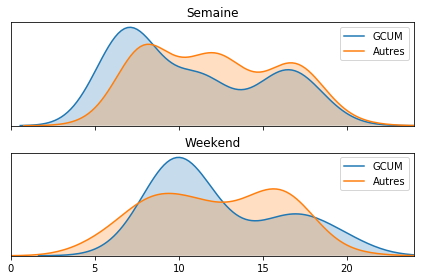

In [3]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

sns.kdeplot(df[(df.categorie == '2') & (df.day_type == 'week')].time.apply(lambda x: x.hour),
            shade=True, legend='GCUM', label='GCUM', ax=ax1)
sns.kdeplot(df[(df.categorie != '2') & (df.day_type == 'week')].time.apply(lambda x: x.hour),
            shade=True, label='Autres', ax=ax1)
# sns.kdeplot(df[df.day_type == 'week'].time.apply(lambda x: x.hour),
#             shade=True, label='Total', ax=ax1)
sns.kdeplot(df[(df.categorie == '2') & (df.day_type == 'weekend')].time.apply(lambda x: x.hour),
            shade=True, legend='GCUM', label='GCUM', ax=ax2)
sns.kdeplot(df[(df.categorie != '2') & (df.day_type == 'weekend')].time.apply(lambda x: x.hour),
            shade=True, label='Autres', ax=ax2)
# sns.kdeplot(df[df.day_type == 'weekend'].time.apply(lambda x: x.hour),
#             shade=True, label='Total', ax=ax2)

ax1.set_title('Semaine')
ax2.set_title('Weekend')

ax1.set_xbound(0, 24)

ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

plt.tight_layout()

plt.show()